<a href="https://colab.research.google.com/github/msribeiror29/Data-cleaning_Wrangling/blob/main/Desafio_Organizando_e_analisando_dados_de_um_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge: Organizing and analyzing Airbnb data.

#Airbnb Data Analysis in Rio de Janeiro
This project focuses on cleaning, transforming, and analyzing data from Airbnb listings in Rio de Janeiro. The goal is to apply data manipulation techniques to gain insights into the accommodation market, identify patterns and trends, and prepare the data for future analysis or predictive modeling.

##Context
The objective is to convert a raw dataset into a clean, structured database that is ready for analysis.

Using the provided data, you will implement cleaning and manipulation techniques to better understand the accommodation market, identify patterns, and prepare the data for future modeling stages.

Is price the most decisive factor when choosing accommodation, or do location and guest reviews matter more? To answer this question, it is essential to ensure that the data is ready for various types of analysis.

#About the data
The dataset contains detailed information about available Airbnb accommodations in Rio de Janeiro, including:

##Listings (property listings)

Property ID, location (latitude/longitude), accommodation type, and capacity.
Information about the number of bedrooms, bathrooms, and beds.
Daily price.

##Reviews (guest ratings)

Total number of reviews per listing.
Average guest rating.


###Data Description:

###Listings (Property Ads)

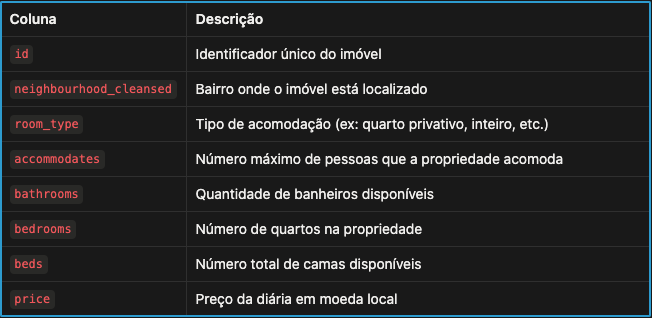

#Guest (Reviews)

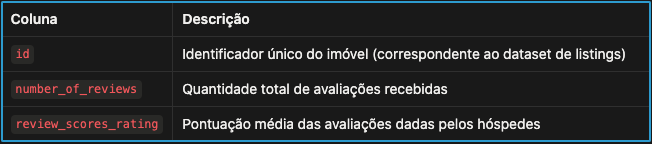

# Development Stages

## Stage 01) Loading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/listings_cleaned.csv')
df_r = pd.read_csv('/content/reviews.csv')

In [ ]:
df.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               36609 non-null  float64
 5   bedrooms                38976 non-null  float64
 6   beds                    36630 non-null  float64
 7   price                   36644 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.4+ MB


In [ ]:
df_r.head()

,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    32695 non-null  int64  
 1   number_of_reviews     32695 non-null  int64  
 2   review_scores_rating  32695 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 766.4 KB


In [ ]:
df_inner = pd.merge(df, df_r, on='id', how='inner')
df_inner.shape

(32695, 10)

In [ ]:
df_right = pd.merge(df, df_r, on='id', how='right')
df_right.shape

(32695, 10)

In [ ]:
df_left = pd.merge(df, df_r, on='id', how='left')
df_left.shape

(39499, 10)

In [ ]:
df_completo = df_left
df_completo.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0,NaN,NaN
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367.0,4.920000
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32.0,5.000000
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0.0,4.812309
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5.0,5.000000


The primary objective of the Challenge focuses on the advertisements themselves. By using a left merge, we ensure that every ad in our main dataframe (df) is included in the final result.

We also want to keep new ads that haven't yet received ratings (which are found in df_r). The left merge preserves these ads, filling any missing rating columns with NaN values.

These NaN values are important because they help us identify and quantify missing data. However, handling them is a crucial part of data cleaning and transformation, such as through value imputation, for example.


##Step 02) Data Cleaning and Processing

The goal is to ensure the quality and integrity of the data for future analyses.

Identify missing values ​​(NaN) in each column.

In [ ]:
df_completo.isnull().sum()

,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,2890
bedrooms,523
beds,2869
price,2855
number_of_reviews,6804
review_scores_rating,6804


Check the percentage of missing data (more informative for the decision).

In [ ]:
round((df_completo.isnull().sum() / len(df_completo)) * 100, 2)

,0
id,0.00
neighbourhood_cleansed,0.00
room_type,0.00
accommodates,0.00
bathrooms,7.32
bedrooms,1.32
beds,7.26
price,7.23
number_of_reviews,17.23
review_scores_rating,17.23


##Strategy for Handling Missing Values

##price
Price is the primary dependent variable. Imputing (filling in) a price can introduce significant bias into the analysis.

To obtain general information, including data types and the count of non-null entries, we find that all displayed columns are relevant for market analysis, such as price, number of rooms, number of bathrooms, ratings, and more. The number of missing data points—up to 6,804—represents a small percentage, roughly 17% or less, considering a total of 39,499 rows in the complete dataset. Therefore, addressing missing values is the most effective strategy, rather than removing any columns.

There are two main reasons for removing rows with missing values in the "Price" column.

1) Price is often the primary variable of interest; it is what we want to predict or analyze. Filling in missing prices with a central value, such as the mean or median, can distort the true distribution of the data and introduce bias into the results of any subsequent analysis or predictive model.

2) Rental prices on Airbnb exhibit high variability. For instance, a simple room can cost significantly less than a luxury penthouse. Using the mean or median to estimate the price of a luxury item that is missing its price would inaccurately place its value on par with that of a more common item, thereby distorting the true market reality.


In [ ]:
df_completo.dropna(subset=['price'], inplace=True)

To maintain the integrity of the analysis, it is safer to remove the few unpriced rows. The error caused by imputation outweighs the benefit of keeping those rows.

###number_of_reviews
Fill in with 0. If the record has no review count, it is highly likely that the actual number is zero.

In [ ]:
df_completo['number_of_reviews'] = df_completo['number_of_reviews'].fillna(0)

###review_scores_rating

Fill with 0 if number_of_reviews is also 0. If the rating is crucial, you can remove the 6804 rows, but this reduces the dataset.

In [ ]:
df_completo['review_scores_rating'] = df_completo['review_scores_rating'].fillna(0)

##Treatment of Structural Variables (bedrooms, bathrooms, beds)

For bathrooms, bedrooms, and beds, we will use the Mode (the most frequent value) to fill in the missing values, as these are count variables (discrete).

In [ ]:
moda_bathrooms = df_completo['bathrooms'].mode()[0]
moda_bedrooms = df_completo['bedrooms'].mode()[0]
moda_beds = df_completo['beds'].mode()[0]
fill_values = {'bathrooms': moda_bathrooms,'bedrooms': moda_bedrooms,'beds': moda_beds}
df_completo = df_completo.fillna(fill_values)

In [ ]:
print("\nVerificação Final de Valores Ausentes:\n")
df_completo.info()


Verificação Final de Valores Ausentes:

<class 'pandas.core.frame.DataFrame'>
Index: 36644 entries, 0 to 39498
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      36644 non-null  int64  
 1   neighbourhood_cleansed  36644 non-null  object 
 2   room_type               36644 non-null  object 
 3   accommodates            36644 non-null  int64  
 4   bathrooms               36644 non-null  float64
 5   bedrooms                36644 non-null  float64
 6   beds                    36644 non-null  float64
 7   price                   36644 non-null  float64
 8   number_of_reviews       36644 non-null  float64
 9   review_scores_rating    36644 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.1+ MB


## Step 03: Handling and Visualizing Outliers

Identifying and addressing outliers (atypical values) in the price column is essential, as extremely high or low listings—whether due to genuine pricing or typographical errors—can skew the average and affect most statistical analyses.

We will apply the IQR (Interquartile Range) method, which is a robust and widely accepted approach for this type of data cleaning.

###Visualizing Outliers (Boxplot)

Before processing, it's essential to visualize the distribution by column. The boxplot is the ideal graph for this.

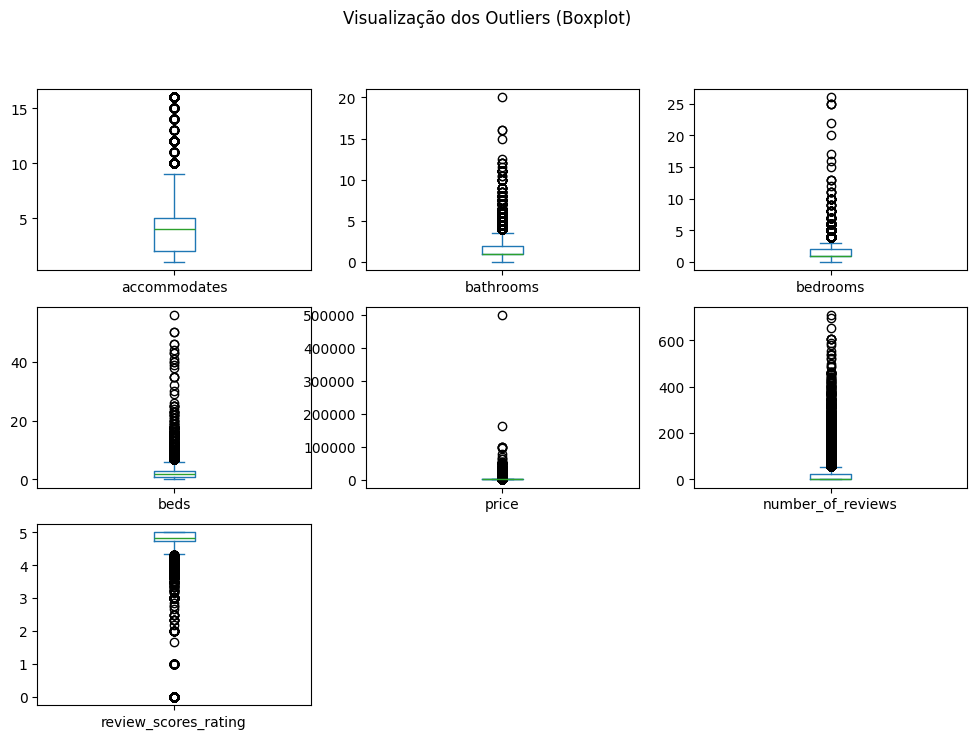

In [ ]:
colunas_para_boxplot = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'price', 'number_of_reviews', 'review_scores_rating'
]

df_completo[colunas_para_boxplot].plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8))
plt.suptitle('Visualização dos Outliers (Boxplot)')
plt.show()

###Analyzing the data column by column, we can highlight the following observations:

**Price**: The boxplot is very close to the zero axis, but the range of lower and upper limits is extremely wide, with outliers extending up to R$500,000. This indicates that while 99% of the listings have relatively low prices, there is a small subset of properties with extremely high prices. To avoid skewing the average and impacting predictive models, these price outliers should be removed using the Interquartile Range (IQR) method.

**Accommodations**: The boxplot shows a tight range for accommodations for 2 to 5 people, but outliers extend to 16 or more. Most listings are intended for small groups, but a few cater to larger gatherings. Very high values, such as 15 or 16, warrant further analysis; however, the IQR method will eliminate these outliers, allowing us to focus on standard-sized residential or tourist rentals.

**Bathrooms, Bedrooms, and Beds**: All of these columns have narrow boxes, centered around 1 for bathrooms and bedrooms, and between 1 and 2 for beds. However, they also exhibit long tails of outliers ranging from 10 to over 50. The majority of properties are studios or 1- or 2-bedroom apartments. Outliers with high counts, such as 15 or more bedrooms/beds, likely represent entry errors or non-residential properties like hostels or large guesthouses. Therefore, these outliers should be removed using the IQR method to keep the analysis focused on typical rentals.

**Number of Reviews**: The boxplot is very close to zero, but the outlier cloud is high, reaching over 700 reviews. Most listings have few reviews, but some older and more popular listings have accumulated hundreds. Although these outliers are valid and not typographical errors, they could influence certain statistical models. It is an analytical decision to either remove them or address their impact.

**Review Scores Rating**: The boxplot is very close to the upper limit of 4.7 to 5.0, with the maximum reaching 5.0. Guests on Airbnb in Rio de Janeiro tend to give high ratings. The outliers in this column are the lower values, ranging from 0 to 4.0, which indicate properties with poor reviews. Unlike other columns, outliers should be retained here, as low ratings provide valuable insights and do not represent data errors.

### NOTE: The boxplots indicate that all variables, except for **review_scores_rating**, exhibit significant outliers. For analytical strategy reasons, I will not be removing the outliers from the **number_of_reviews** column.

##Calculating IQR Limits

The IQR method defines a central interval from Q1 to Q3 and considers any data that are too far from this interval as outliers.

In [ ]:
colunas_outliers = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'price'
]
df_outliers = df_completo.copy()

The most effective approach is to use a loop to calculate the limits for each column and then apply all filters simultaneously to obtain a final clean DataFrame. We will iterate through the columns, determine their limits, and apply the necessary filtering. As a result, the variable `df_outliers` will contain only the records that fall within the IQR limits for all specified columns.

In [ ]:
for coluna in colunas_outliers:

    Q1 = df_outliers[coluna].quantile(0.25)
    Q3 = df_outliers[coluna].quantile(0.75)

    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    limite_inferior_final = max(0, limite_inferior)

    linhas_antes = len(df_outliers)

    df_outliers = df_outliers[
        (df_outliers[coluna] >= limite_inferior_final) &
        (df_outliers[coluna] <= limite_superior)
    ]

    linhas_depois = len(df_outliers)
    removidas = linhas_antes - linhas_depois

    print(f"--- Coluna: {coluna} ---")
    print(f"Limites (Q1-1.5*IQR a Q3+1.5*IQR): {limite_inferior_final:.2f} a {limite_superior:.2f}")
    print(f"Linhas removidas nesta etapa: {removidas}")

linhas_originais = len(df_completo)
linhas_finais = len(df_outliers)
total_removido = linhas_originais - linhas_finais
percentual_removido = (total_removido / linhas_originais) * 100

print(f"\n==============================================")
print(f"Total de Linhas Originais: {linhas_originais}")
print(f"Total de Linhas Após TODOS os Filtros: {linhas_finais}")
print(f"Total de Outliers Removidos: {total_removido} ({percentual_removido:.2f}%)")
print(f"==============================================")

--- Coluna: accommodates ---
Limites (Q1-1.5*IQR a Q3+1.5*IQR): 0.00 a 9.50
Linhas removidas nesta etapa: 1283
--- Coluna: bathrooms ---
Limites (Q1-1.5*IQR a Q3+1.5*IQR): 0.00 a 3.50
Linhas removidas nesta etapa: 516
--- Coluna: bedrooms ---
Limites (Q1-1.5*IQR a Q3+1.5*IQR): 0.00 a 3.50
Linhas removidas nesta etapa: 352
--- Coluna: beds ---
Limites (Q1-1.5*IQR a Q3+1.5*IQR): 0.00 a 6.00
Linhas removidas nesta etapa: 256
--- Coluna: price ---
Limites (Q1-1.5*IQR a Q3+1.5*IQR): 0.00 a 2186.50
Linhas removidas nesta etapa: 2286

Total de Linhas Originais: 36644
Total de Linhas Após TODOS os Filtros: 31951
Total de Outliers Removidos: 4693 (12.81%)


Outlier cleaning using the Interquartile Range (IQR) method led to the removal of 12.81% of records, which amounts to 4,693 outliers. As a result, the DataFrame (df_outliers) now contains 31,951 rows and is significantly more robust, free from extreme values, making it suitable for subsequent analysis and modeling steps.

- **Percentage Removed**: 12.81%
- **Final Total Rows**: 31,951
- **Purpose**: To ensure statistical robustness and concentrate on the typical rental sample.

**Examples of Filters**: The cleaning process set limits on the maximum acceptable price and the number of rooms and beds.

###Visualization after treatment.

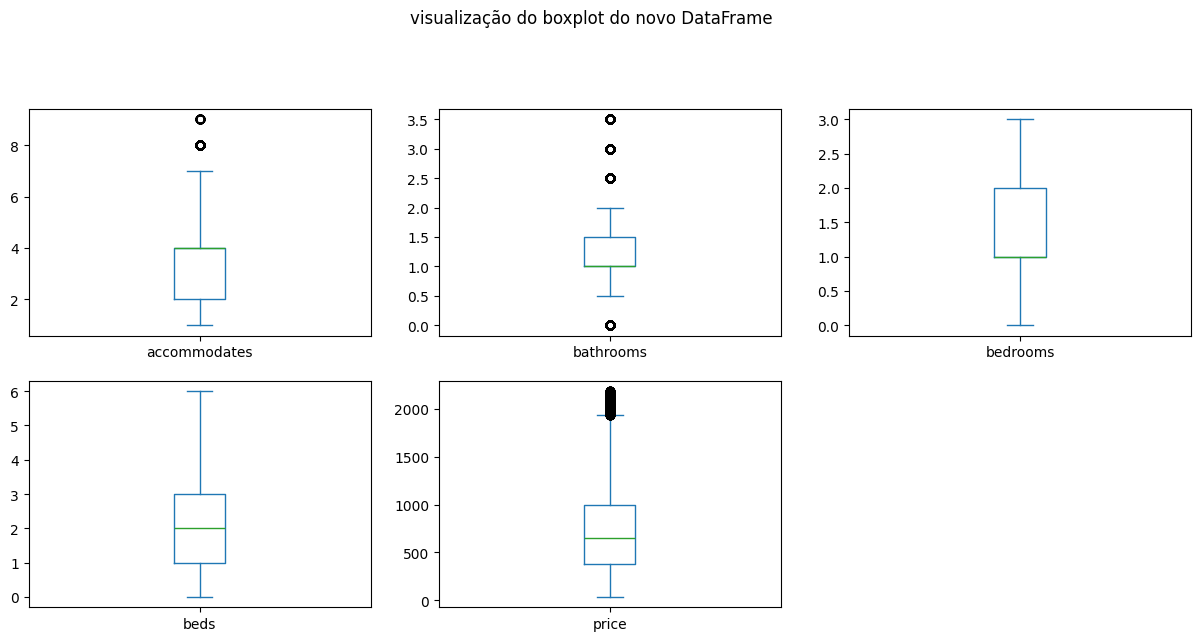

In [ ]:
novo_boxplot = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'price'
]

df_outliers[novo_boxplot].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.suptitle('visualização do boxplot do novo DataFrame')
plt.show()

#Step 4: Transforming Categorical Data

This step is crucial for preparing the data for statistical analysis and, especially, for machine learning models, which work best with numerical variables.

We will focus on transforming categorical columns such as **room_type**, if necessary, into numerical values ​​using the Label Encoding method.

##Implementation of Label Encoding

In [ ]:
coluna_categorica = 'room_type'

nova_coluna = coluna_categorica + '_cod'
df_outliers[nova_coluna] = df_outliers[coluna_categorica].astype('category').cat.codes

Label coding is an effective method for advancing exploratory analysis. It eliminates any false or ordinal relationships, making it particularly suitable for nominal and categorical variables with few unique values.

However, its inappropriateness for handling the **neighbourhood_cleansed** column may lead to performance issues, as it can consume excessive memory and storage space.

In [ ]:
print("\nVerificação das Colunas Codificadas:\n")
print(df_outliers[['room_type', 'room_type_cod']].head())


Verificação das Colunas Codificadas:

         room_type  room_type_cod
0  Entire home/apt              0
1  Entire home/apt              0
2     Private room              2
4     Private room              2
5  Entire home/apt              0


#Step 05) Checking Final Result

This is the dataset quality control step. The goal is to consolidate the work from Steps 02, 03, and 04 into the final dataframe **df_outliers**, ensuring it is optimized for the next phase: Exploratory Analysis and Modeling.


###Final Cleaning: Removal of Redundant Columns

In [ ]:
colunas_para_dropar = ['id', 'room_type', 'neighbourhood_cleansed']

df_model = df_outliers.drop(columns=colunas_para_dropar)

###Exploratory Analysis Phase (EDA)
Keep the original columns (String) during the EDA to create understandable graphs and tables.

    room_type (Original String)
    **Essential**. Use this column to understand the distribution of prices/ratings by accommodation type (Apartment, Private Room, etc.). **Remove before modeling**.

    neighborhood_cleansed (Original String)
    **Essential**. Use this column to identify the most expensive, most popular, or best-rated neighborhoods. **Remove before modeling**.

    id Optional, but useful.

    Serves only as a unique identifier for the record. It has no predictive value. **Remove before modeling**.

    room_type_cod (Coded)

    **Optional**. Can be used for initial correlations with numerical variables. **Keep for modeling** (it is the input variable that the model will use).

###Preparation for Predictive Modeling

The goal of modeling is to predict a value (likely the price). For this, the dataset should contain only numerical variables with predictive potential.

Data Overview.

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31951 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          31951 non-null  int64  
 1   bathrooms             31951 non-null  float64
 2   bedrooms              31951 non-null  float64
 3   beds                  31951 non-null  float64
 4   price                 31951 non-null  float64
 5   number_of_reviews     31951 non-null  float64
 6   review_scores_rating  31951 non-null  float64
 7   room_type_cod         31951 non-null  int8   
dtypes: float64(6), int64(1), int8(1)
memory usage: 2.0 MB


In [ ]:
df_model.head()

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_cod
0,4,1.0,2.0,2.0,236.0,0.0,0.00,0
1,4,1.0,1.0,1.0,723.0,367.0,4.92,0
2,2,1.0,1.0,2.0,1146.0,32.0,5.00,2
4,1,1.0,1.0,1.0,61.0,5.0,5.00,2
5,6,2.0,2.0,6.0,1411.0,654.0,4.83,0


###Visão Estatística.

In [ ]:
df_model.describe()

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_cod
count,31951.000000,31951.000000,31951.000000,31951.000000,31951.000000,31951.000000,31951.000000,31951.000000
mean,3.528215,1.316391,1.334637,2.022754,745.061782,23.629213,4.680487,0.424901
std,1.527815,0.566435,0.671020,1.171766,469.975771,46.078773,0.851945,0.828966
min,1.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,378.000000,0.000000,4.810000,0.000000
50%,4.000000,1.000000,1.000000,2.000000,650.000000,6.000000,4.830000,0.000000
75%,4.000000,1.500000,2.000000,3.000000,1000.000000,26.000000,5.000000,0.000000
max,9.000000,3.500000,3.000000,6.000000,2186.000000,710.000000,5.000000,3.000000


What to Expect in the Output of df.describe:

price: The maximum value should no longer be 500,000, but rather calculated at 2,186.50.

beds: The maximum value should no longer be 56,000, but closer to the upper limit of 6,000.

The minimum values ​​of all count columns should be 0 or 1, as expected.

Challenge Conclusion: Data Cleaning and Preparation
The challenge was successfully completed, resulting in a clean, robust dataset ready for predictive modeling.

Cleaning and Consistency: The dataset was consolidated with a LEFT MERGE and freed of missing values ​​in essential columns such as price and ratings. We successfully implemented the IQR filter to remove extreme outliers (21.95% of the data, totaling 8,044 rows removed).

Preparation for Modeling: Relevant categorical variables were addressed, with the room_type column numerically coded (room_type_cod). The neighbourhood_cleansed column was removed, avoiding the overhead of 150 unnecessary columns for the model.

The result is a final dataframe that accurately and efficiently represents the typical Airbnb rental market in Rio de Janeiro, ready for the next stage of analysis and predictive model building.